<h1><center>  <font color='c48df7'> Base de datos: Índice de calidad del aire </font></center></h1>

<font color='#40afdb'> Importamos las librerías que necesitamos </font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import minimize
import glob
import pandas as pd
import re
import unicodecsv as cs
import csv 
import seaborn as sns
from seaborn import kdeplot

<font color='#40afdb'> Introducimos los documentos </font>

In [2]:
file='/Users/Angie/Downloads/DatosHIGI2' 
files=glob.glob("./DatosHIGI2/*.csv")
files

['./DatosHIGI2\\indice_2010.csv',
 './DatosHIGI2\\indice_2011.csv',
 './DatosHIGI2\\indice_2012.csv',
 './DatosHIGI2\\indice_2013.csv',
 './DatosHIGI2\\indice_2014.csv',
 './DatosHIGI2\\indice_2015.csv',
 './DatosHIGI2\\indice_2016.csv',
 './DatosHIGI2\\indice_2017.csv',
 './DatosHIGI2\\indice_2018.csv']

In [4]:
#Seleccionamos las columnas necesarias 
#y transformamos todas las fechas encontradas en los csv a datetime, para poder agruparlas

data1 = pd.read_csv (files[0], usecols= ['Fecha','Noroeste mon�xido de carbono'])
data1["Fecha"] = pd.to_datetime(data1["Fecha"], errors="coerce")
print (data1)

data2 = pd.read_csv (files[1], usecols= ['Fecha','Noroeste mon�xido de carbono'])
data2["Fecha"] = pd.to_datetime(data2["Fecha"], errors="coerce")

data3 = pd.read_csv (files[2], usecols= ['Fecha','Noroeste mon�xido de carbono'])
data3["Fecha"] = pd.to_datetime(data3["Fecha"], errors="coerce")

data4 = pd.read_csv (files[3], usecols= ['Fecha','Noroeste mon�xido de carbono'])
data4["Fecha"] = pd.to_datetime(data4["Fecha"], errors="coerce")

data5 = pd.read_csv (files[4], usecols= ['Fecha','Noroeste mon�xido de carbono'])
data5["Fecha"] = pd.to_datetime(data5["Fecha"], errors="coerce")

data6 = pd.read_csv (files[5], usecols= ['Fecha','Noroeste mon�xido de carbono'])
data6["Fecha"] = pd.to_datetime(data6["Fecha"], errors="coerce")

data7 = pd.read_csv (files[6], usecols= ['Fecha','Noroeste mon�xido de carbono'])
data7["Fecha"] = pd.to_datetime(data7["Fecha"], errors="coerce")

data8 = pd.read_csv (files[7], usecols= ['Fecha','Noroeste mon�xido de carbono'])
data8["Fecha"] = pd.to_datetime(data8["Fecha"], errors="coerce")

data9 = pd.read_csv (files[8], usecols= ['Fecha','Noroeste mon�xido de carbono'])
data9["Fecha"] = pd.to_datetime(data9["Fecha"], errors="coerce")

          Fecha  Noroeste mon�xido de carbono
0    2010-01-01                            16
1    2010-01-01                            17
2    2010-01-01                            18
3    2010-01-01                            18
4    2010-01-01                            19
...         ...                           ...
8755 2010-12-31                             7
8756 2010-12-31                             8
8757 2010-12-31                             9
8758 2010-12-31                            10
8759 2010-12-31                            11

[8760 rows x 2 columns]


# Creación de tablas y pruebas

In [5]:
#Así evitariamos el sorting de las tablas pivote

table1 = data1.groupby(('Fecha'), sort=False).sum()
print (table1)

            Noroeste mon�xido de carbono
Fecha                                   
2010-01-01                           246
2010-02-01                           263
2010-03-01                           190
2010-04-01                           205
2010-05-01                           265
...                                  ...
2010-12-27                           458
2010-12-28                           491
2010-12-29                           462
2010-12-30                           456
2010-12-31                           513

[365 rows x 1 columns]


In [9]:
#Así agrupamos la suma de todo un año del Mónoxido de carbono data por data

table11 = pd.pivot_table(data1, index=pd.Grouper(key="Fecha", freq="y", sort=False), columns= None, values='Noroeste mon�xido de carbono', aggfunc='sum')
print(table11)

table21 = pd.pivot_table(data2, index=pd.Grouper(key="Fecha", freq="y", sort=False), columns= None, values='Noroeste mon�xido de carbono', aggfunc='sum')
print(table21)

table31 = pd.pivot_table(data3, index=pd.Grouper(key="Fecha", freq="y", sort=False), columns= None, values='Noroeste mon�xido de carbono', aggfunc='sum')
print(table31)

table41 = pd.pivot_table(data4, index=pd.Grouper(key="Fecha", freq="Y", sort=False), columns= None, values='Noroeste mon�xido de carbono', aggfunc='sum')
print(table41)

table51 = pd.pivot_table(data5, index=pd.Grouper(key="Fecha", freq="Y", sort=False), columns= None, values='Noroeste mon�xido de carbono', aggfunc='sum')
print(table51)

table61 = pd.pivot_table(data6, index=pd.Grouper(key="Fecha", freq="Y", sort=False), columns= None, values='Noroeste mon�xido de carbono', aggfunc='sum')
print(table61)

table71 = pd.pivot_table(data7, index=pd.Grouper(key="Fecha", freq="Y", sort=False), columns= None, values='Noroeste mon�xido de carbono', aggfunc='sum')
print(table71)

table81 = pd.pivot_table(data8, index=pd.Grouper(key="Fecha", freq="Y", sort=False), columns= None, values='Noroeste mon�xido de carbono', aggfunc='sum')
print(table81)

table91 = pd.pivot_table(data9, index=pd.Grouper(key="Fecha", freq="Y", sort=False), columns= None, values='Noroeste mon�xido de carbono', aggfunc='sum')
print(table91)

            Noroeste mon�xido de carbono
Fecha                                   
2010-12-31                        114911
            Noroeste mon�xido de carbono
Fecha                                   
2011-12-31                         98999
            Noroeste mon�xido de carbono
Fecha                                   
2012-12-31                         76557
            Noroeste mon�xido de carbono
Fecha                                   
2013-12-31                         87032
            Noroeste mon�xido de carbono
Fecha                                   
2014-12-31                       80897.0
            Noroeste mon�xido de carbono
Fecha                                   
2015-12-31                       78152.0
            Noroeste mon�xido de carbono
Fecha                                   
2016-12-31                       70309.0
            Noroeste mon�xido de carbono
Fecha                                   
2017-12-31                       57781.0
            Noro

<font color='#40afdb'> Creamos un arreglo con las fechas que vamos a utilizar </font>

In [10]:
#Creamos un arreglo con los años que utilizaremos en la tabla 

date=[]
date_=[]
files_=[]
for i,file in enumerate(files):
    date.append(re.findall(r'\d+',file)[1])  
Fechas=np.asarray(date)

temp=sorted(range(len(date)), key=date.__getitem__)

for i in temp:
    date_.append(date[i])
    print(date[i],files[i])
    files_.append(files[i])
files_

Fechas

2010 ./DatosHIGI2\indice_2010.csv
2011 ./DatosHIGI2\indice_2011.csv
2012 ./DatosHIGI2\indice_2012.csv
2013 ./DatosHIGI2\indice_2013.csv
2014 ./DatosHIGI2\indice_2014.csv
2015 ./DatosHIGI2\indice_2015.csv
2016 ./DatosHIGI2\indice_2016.csv
2017 ./DatosHIGI2\indice_2017.csv
2018 ./DatosHIGI2\indice_2018.csv


array(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018'], dtype='<U4')

In [11]:
#De aquí obtenemos la suma anual de monóxido de carbono en la zona noroeste de cdmx
arreglo_info=[]
for i,file in enumerate(files):
    data=pd.read_csv(file)
    data["Fecha"] = pd.to_datetime(data["Fecha"], errors="coerce")
    monoxido=pd.pivot_table(data, index=pd.Grouper(key="Fecha", freq="Y"), columns= None, values='Noroeste mon�xido de carbono', aggfunc='sum')
    arreglo_info.append(monoxido)

arreglo_info
#  monoxido=pd.pivot_table(data, index=pd.Grouper(key="Fecha", freq="Y"), columns= None, values='Noroeste mon�xido de carbono', aggfunc='sum')

[            Noroeste mon�xido de carbono
 Fecha                                   
 2010-12-31                        114911,
             Noroeste mon�xido de carbono
 Fecha                                   
 2011-12-31                         98999,
             Noroeste mon�xido de carbono
 Fecha                                   
 2012-12-31                         76557,
             Noroeste mon�xido de carbono
 Fecha                                   
 2013-12-31                         87032,
             Noroeste mon�xido de carbono
 Fecha                                   
 2014-12-31                       80897.0,
             Noroeste mon�xido de carbono
 Fecha                                   
 2015-12-31                       78152.0,
             Noroeste mon�xido de carbono
 Fecha                                   
 2016-12-31                       70309.0,
             Noroeste mon�xido de carbono
 Fecha                                   
 2017-12-31                

In [12]:
#Creamos un arreglo con los datos del Monóxido para evitar que se visualice en gráficas y tablas el "�" generado.
Monóxido=np.array([114911 ,98999 ,76557 ,87032, 80897, 78152, 70309, 57781, 48179])

In [13]:
#Creamos un dataframe con los valores obtenidos
tabla_t = {'Año' : Fechas, 'Noroeste Monóxido de Carbono' : Monóxido}

tabla_t = pd.DataFrame(tabla_t, columns = ['Año', 'Noroeste Monóxido de Carbono'])
tabla_t

,Año,Noroeste Monóxido de Carbono
0,2010,114911
1,2011,98999
2,2012,76557
3,2013,87032
4,2014,80897
5,2015,78152
6,2016,70309
7,2017,57781
8,2018,48179


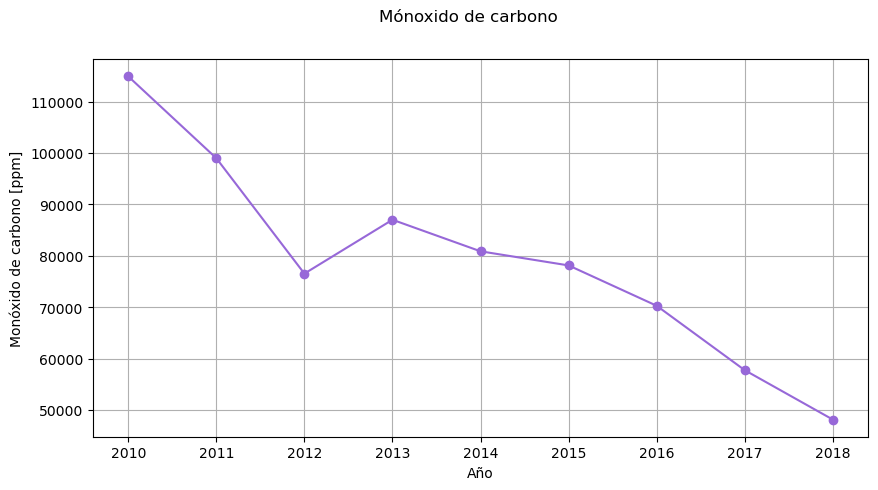

In [14]:
#Graficamos para ver el comportamiento del Monóxido a través de los años
fig, ax = plt.subplots(figsize=(10, 5),dpi=100)

plt.plot(Fechas, Monóxido, marker ='o', color ='#9768d8')
ax.set(xlabel = "Año", ylabel = "Monóxido de carbono [ppm]")

plt.suptitle("Mónoxido de carbono")

plt.grid(True)
plt.show()

Donde:
1=2010, 
2=2011, 
3=2012, 
4=2013, 
5=2014, 
6=2015, 
7=2016, 
8=2017, 
9=2018, 

In [41]:
#Hacemos el ajuste lineal
pendiente, ordenada =np.polyfit(Fecha,Monóxido,1)


113531.72222222223

In [43]:
#Hacemos las predicciones, considerando y=mx+b
pred_2019=(pendiente*10)+ordenada
pred_2020=(pendiente*11)+ordenada
pred_2021=(pendiente*12)+ordenada

## Predicciones

<font color='#40afdb'> Predicción 2019</font>

In [52]:
pred_2019

44872.05555555553

<font color='#40afdb'> Predicción 2020 </font>

In [45]:
pred_2020

38006.08888888886

<font color='#40afdb'> Predicción 2021 </font>

In [48]:
pred_2021

31140.1222222222